# Convolutional Neural Network for Brain Tumor Detection

This data set was extracted from **Kaggle** and this project is going to be added to all the final project models of the pattern recognition subject at school.

Link : https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri

The next libraries are the main ones we will use in this project

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


## Retrieving Data

Here we retrieve all the images that are located in my own google drive folder so we can work with them.

### Training Data

In [ ]:
import os
from PIL import Image

folder_path_glioma_tumor = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Training/glioma_tumor/'
folder_path_meningioma_tumor = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Training/meningioma_tumor/'
folder_path_no_tumor = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Training/no_tumor/'
folder_path_pituitary_tumor = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Training/pituitary_tumor/'

files_glioma_tumor = os.listdir(folder_path_glioma_tumor)
files_meningioma_tumor = os.listdir(folder_path_meningioma_tumor)
files_no_tumor = os.listdir(folder_path_no_tumor)
files_pituitary_tumor = os.listdir(folder_path_pituitary_tumor)

image_files_glioma_tumor = [f for f in files_glioma_tumor if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files_meningioma_tumor = [f for f in files_meningioma_tumor if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files_no_tumor = [f for f in files_no_tumor if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files_pituitary_tumor = [f for f in files_pituitary_tumor if f.endswith(('.jpg', '.png', '.jpeg'))]

* Example of an image

Image width: 512
Image height: 512


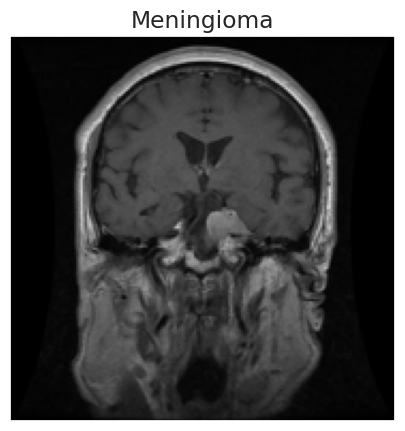

In [ ]:
path_example = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Training/meningioma_tumor/m (18).jpg'
image = Image.open(path_example)

# Get the size of the image
image_size = image.size

new_shape = (180, 180)  # New shape (width, height)
resized_image = image.resize(new_shape)

# Print the width and height of the image
print("Image width:", image_size[0])
print("Image height:", image_size[1])

# Now we see the image
plt.imshow(resized_image)
plt.yticks([])
plt.xticks([])
plt.title('Meningioma')
plt.show()

### Test Data

In [ ]:
import os
from PIL import Image

folder_path_glioma_tumor_t = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Testing/glioma_tumor/'
folder_path_meningioma_tumor_t = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Testing/meningioma_tumor/'
folder_path_no_tumor_t = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Testing/no_tumor/'
folder_path_pituitary_tumor_t = '/content/drive/MyDrive/MacBook/Documentos/School/DataScience/6thSemester/Reconocimiento-Patrones/ProyectoFinal/archive/Testing/pituitary_tumor/'

files_glioma_tumor_t = os.listdir(folder_path_glioma_tumor_t)
files_meningioma_tumor_t = os.listdir(folder_path_meningioma_tumor_t)
files_no_tumor_t = os.listdir(folder_path_no_tumor_t)
files_pituitary_tumor_t = os.listdir(folder_path_pituitary_tumor_t)

image_files_glioma_tumor_t = [f for f in files_glioma_tumor_t if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files_meningioma_tumor_t = [f for f in files_meningioma_tumor_t if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files_no_tumor_t = [f for f in files_no_tumor_t if f.endswith(('.jpg', '.png', '.jpeg'))]
image_files_pituitary_tumor_t = [f for f in files_pituitary_tumor_t if f.endswith(('.jpg', '.png', '.jpeg'))]

## Processing data.

### Train data

In [ ]:
# Labels for the data
labels_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

Here we process the images for the training set of data

In [ ]:
import cv2

# Defining the size of the data
SIZE_IMG = 180

def get_data(image_files, folder_path, classe):
  data = []
  labels = []
  # Data counting
  num_data = 0
  # Data retrieving
  for image_file in image_files:
      image_path = os.path.join(folder_path, image_file)
      img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
      resized_image = cv2.resize(img, (SIZE_IMG, SIZE_IMG))
      # Normalizing to 0-1 and reshaping the image
      image_array = (np.array(resized_image)/255.0).reshape(SIZE_IMG, SIZE_IMG, 1)
      data.append(image_array)
      num_data += 1
  labels += [classe]*num_data
  return data, labels

In [ ]:
# Processing all the directories for each type of tumor
data_glioma, labels_glioma = get_data(image_files_glioma_tumor, folder_path_glioma_tumor, 0)
data_meningioma, labels_meningioma = get_data(image_files_meningioma_tumor, folder_path_meningioma_tumor, 1)
data_no_tumor, labels_no_tumor = get_data(image_files_no_tumor, folder_path_no_tumor, 2)
data_pituitary, labels_pituitary = get_data(image_files_pituitary_tumor, folder_path_pituitary_tumor, 3)

In [ ]:
# Concatenating all the images in one set
data_train = data_glioma + data_meningioma + data_no_tumor + data_pituitary
labels_train = labels_glioma + labels_meningioma + labels_no_tumor + labels_pituitary

data_train = np.array(data_train)
labels_train = np.array(labels_train)

In [ ]:
print(f'Contamos con : {len(data_train)} imágenes médicas')
print(f'Cuyas etiquetas son : {[labels_names[x] for x in set(labels_train)]}')

Contamos con : 2870 imágenes médicas
Cuyas etiquetas son : ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


### Test Data

In [ ]:
# Processing all the directories for each type of tumor
data_glioma, labels_glioma = get_data(image_files_glioma_tumor_t, folder_path_glioma_tumor_t, 0)
data_meningioma, labels_meningioma = get_data(image_files_meningioma_tumor_t, folder_path_meningioma_tumor_t, 1)
data_no_tumor, labels_no_tumor = get_data(image_files_no_tumor_t, folder_path_no_tumor_t, 2)
data_pituitary, labels_pituitary = get_data(image_files_pituitary_tumor_t, folder_path_pituitary_tumor_t, 3)

In [ ]:
# Concatenating all images in one set
data_test = data_glioma + data_meningioma + data_no_tumor + data_pituitary
labels_test = labels_glioma + labels_meningioma + labels_no_tumor + labels_pituitary
data_test = np.array(data_test)
labels_test = np.array(labels_test)

In [ ]:
print(f'Contamos con : {len(data_test)} imágenes médicas')
print(f'Cuyas etiquetas son : {[labels_names[x] for x in set(labels_test)]}')

Contamos con : 394 imágenes médicas
Cuyas etiquetas son : ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
X_train, X_test = data_train, data_test
y_train, y_test = labels_train, labels_test

* Shapes

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2870, 180, 180, 1)
(394, 180, 180, 1)


* Fixing the shape from 1D to 4D as one-hot encoder.

In [ ]:
print(y_train.shape)
print(y_test.shape)

(2870,)
(394,)


In [ ]:
import tensorflow.keras.utils as np_utils
import numpy as np

# Convert labels to one-hot encoded format
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

print(y_train.shape)
print(y_test.shape)

(2870, 4)
(394, 4)


## Convolutional Neural Network Beginning

From here we're going to start all the processing for our convolutional Neural Network.

* First and foremost we will be applying the ImageDataGenerator function which is a powerful tool for generating augmented data on-the-fly during training. It provides various image transformation and augmentation techniques to increase the diversity of your training data and improve the generalization of your model.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with desired augmentation settings
datagen = ImageDataGenerator(
    rotation_range=20,      # Random rotation up to 20 degrees
    width_shift_range=0.1,  # Randomly shift the width by 10%
    height_shift_range=0.1, # Randomly shift the height by 10%
    shear_range=0.1,        # Apply random shear transformation
    zoom_range=0.1,         # Randomly zoom in/out by 10%
    horizontal_flip=True,   # Randomly flip images horizontally
    vertical_flip=False     # Do not flip images vertically
)

datagen.fit(X_train)

Now we can see how are the balance of the classes

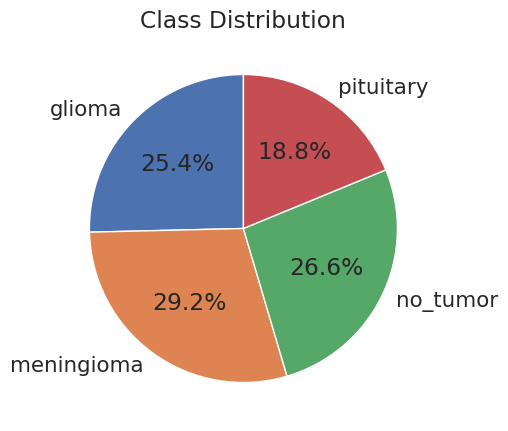

In [ ]:
# Visualizamos los porcentajes de cada una de las clases en el conjunto de entrenamiento.
etiquetas = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
valores = [len(data_glioma) , len(data_meningioma) , len(data_no_tumor) , len(data_pituitary)]
fig, ax = plt.subplots()
ax.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90)
ax.set_title('Class Distribution')
plt.show()

We can see data is almost balanced except for pituitary and this might cause problems while training the model. And we need to consider this when the model computes weights of each class with the function: **compute_class_weight**.

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels_train), y=labels_train)
weights = {i: class_weights[i] for i in range(len(class_weights))}
print(weights)

{0: 0.8686440677966102, 1: 0.8728710462287105, 2: 1.8164556962025316, 3: 0.8675937122128174}


### Building the model architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

def residual_block(x, filters, stride):
    # Convolutional Block 1
    conv1 = layers.Conv2D(filters, kernel_size=(3, 3), strides=stride, padding='same')(x)
    bn1 = layers.BatchNormalization()(conv1)
    act1 = layers.Activation('relu')(bn1)

    # Convolutional Block 2
    conv2 = layers.Conv2D(filters, kernel_size=(3, 3), padding='same')(act1)
    bn2 = layers.BatchNormalization()(conv2)

    # Jump Conection
    if stride > 1:
        shortcut = layers.Conv2D(filters, kernel_size=(1, 1), strides=stride, padding='same')(x)
        shortcut = layers.BatchNormalization()(shortcut)
    else:
        shortcut = x

    # Adding the jump conection with the convolutional process
    added = layers.Add()([bn2, shortcut])
    out = layers.Activation('relu')(added)
    return out

def create_resnet(size = SIZE_IMG):
    inputs = tf.keras.Input(shape=(size, size, 1))

    # Inital layer
    x = layers.Conv2D(filters=64, kernel_size=(7, 7), strides=(2, 2), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

    # Res Blocks
    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=64, stride=1)
    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128, stride=1)
    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256, stride=1)

    # Final Layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(256, activation='relu')(x)
    outputs = layers.Dense(len(labels_names), activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

# Build the model
model = create_resnet()
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 180, 180, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_72 (Conv2D)             (None, 90, 90, 64)   3200        ['input_5[0][0]']                
                                                                                                  
 batch_normalization_68 (BatchN  (None, 90, 90, 64)  256         ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                            

### Model Fitting

**ReduceLROnPlateau** is used to control the learning rate once the model metric validation stop improving.

**EarlyStopping** is used to stop the training once the model metric validation stop improving in during a certain number of epochs. This allow us to not overfit the model and save time and resources of training.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Reducing
min_delta = 0.01
lr_reduce = ReduceLROnPlateau(monitor='val_accuracy', factor=0.7, min_delta=min_delta, patience=10, verbose=1)

# Early Stopping
early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
CALLBACKS = [lr_reduce, early_stopping_cb]

# Metrics
METRICS = ['accuracy',
          tf.keras.metrics.Precision(name='precision'),
          tf.keras.metrics.Recall(name='recall')]

# Compiling the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=min_delta),
    loss='categorical_crossentropy',
    metrics=METRICS
)

In [ ]:
BATCH_SIZE = 32

# Generate augmented data from the original dataset
augmented_data = datagen.flow(X_train, y_train, batch_size=BATCH_SIZE)

# Create and compile the model
model = create_resnet()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model with augmented data
print('Entrenando el modelo...')
historial = model.fit(
    augmented_data,
    steps_per_epoch=len(X_train)//BATCH_SIZE,
    epochs=30,
    class_weight = weights)
print('Listo, modelo entrenado')

Entrenando el modelo...
Epoch 1/30
89/89 [==============================] - 22s 107ms/step - loss: 0.9906 - accuracy: 0.5849
Epoch 2/30
89/89 [==============================] - 10s 116ms/step - loss: 0.7881 - accuracy: 0.6646
Epoch 3/30
89/89 [==============================] - 10s 115ms/step - loss: 0.6894 - accuracy: 0.7125
Epoch 4/30
89/89 [==============================] - 14s 160ms/step - loss: 0.5956 - accuracy: 0.7593
Epoch 5/30
89/89 [==============================] - 13s 144ms/step - loss: 0.5454 - accuracy: 0.7826
Epoch 6/30
89/89 [==============================] - 12s 131ms/step - loss: 0.4949 - accuracy: 0.8020
Epoch 7/30
89/89 [==============================] - 12s 131ms/step - loss: 0.4422 - accuracy: 0.8206
Epoch 8/30
89/89 [==============================] - 9s 105ms/step - loss: 0.4302 - accuracy: 0.8295
Epoch 9/30
89/89 [==============================] - 9s 96ms/step - loss: 0.3919 - accuracy: 0.8485
Epoch 10/30
89/89 [==============================] - 9s 95ms/step - lo

### Loss and Accuracy of the model

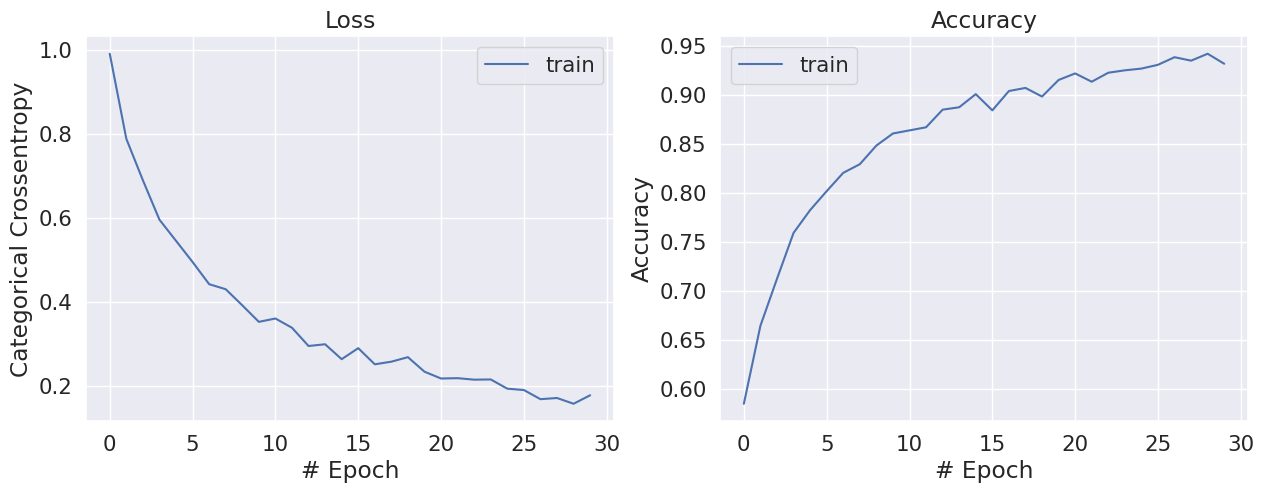

In [ ]:
plt.rcParams['figure.figsize'] = (15,5)

fig, ax = plt.subplots(1,2)

ax[0].set_xlabel("# Epoch")
ax[0].set_ylabel('Categorical Crossentropy')
#ax[0].plot(historial.history['val_loss'])
ax[0].plot(historial.history['loss'])
ax[0].set_title('Loss')
ax[0].legend(['train', 'val'])

ax[1].set_xlabel("# Epoch")
ax[1].set_ylabel('Accuracy')
#ax[1].plot(historial.history['val_accuracy'])
ax[1].plot(historial.history['accuracy'])
ax[1].set_title('Accuracy')
ax[1].legend(['train', 'val'])

plt.show()

In [ ]:
# Vemos los scores que obtuvo el modelo con los datos de prueba.
print("Loss of the model is - " , model.evaluate(X_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(X_test,y_test)[1]*100 , "%")

13/13 [==============================] - 0s 24ms/step - loss: 2.8529 - accuracy: 0.6726
Loss of the model is -  2.8529391288757324
13/13 [==============================] - 0s 19ms/step - loss: 2.8529 - accuracy: 0.6726
Accuracy of the model is -  67.25888252258301 %


In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

# Assuming y_true is the true labels in one-hot encoded format and y_pred is the predicted labels
# y_true has shape (num_samples, num_classes), while y_pred has shape (num_samples,)

# Convert the one-hot encoded labels to class indices
y_true_indices = np.argmax(y_test, axis=1)

# Convert the predicted labels to class indices
y_pred_indices = np.argmax(y_pred, axis=1)

# Calculate the accuracy
accuracy = accuracy_score(y_true_indices, y_pred_indices)


13/13 [==============================] - 1s 21ms/step


## Confussion Matrix

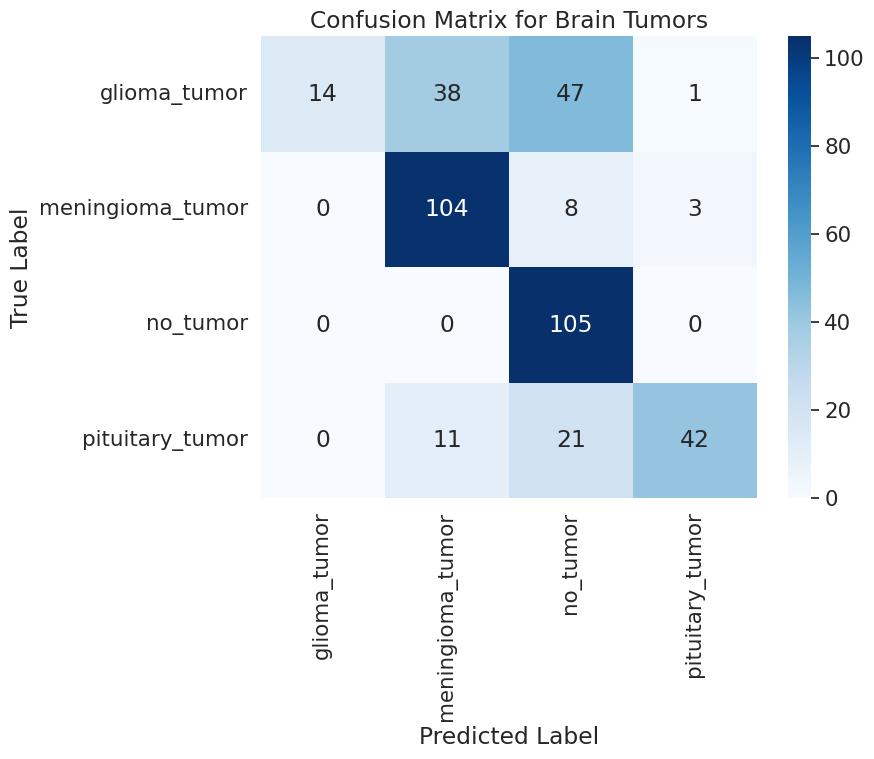

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_true is the true labels in one-hot encoded format and y_pred is the predicted labels
# y_true has shape (num_samples, num_classes), while y_pred has shape (num_samples, num_classes)

# Convert the one-hot encoded labels to class indices
y_true_indices = np.argmax(y_test, axis=1)
y_pred_indices = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true_indices, y_pred_indices)

# Get the class labels
class_labels = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]  # Replace with your actual class labels

# Create a figure and axes
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Brain Tumors')

# Show the plot
plt.show()
